In [77]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras import layers, models, datasets 
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [78]:
# Load the ResNet50 model pre-trained on ImageNet
resnet_model = ResNet50(weights='imagenet')

In [79]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [80]:
import matplotlib.image as mpimg 
from tensorflow.keras.preprocessing import image

In [81]:
img = image.load_img("cat.png", target_size=(224, 224))  # Resize image to 224x224

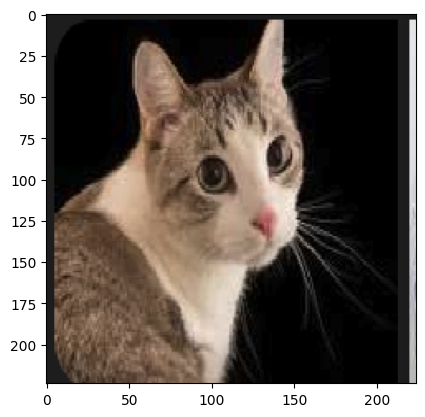

In [82]:
import matplotlib.pyplot as plt 
plt.imshow(img)

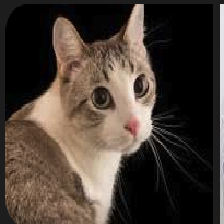

In [83]:
img

In [84]:
# Convert the image to a numpy array
img_array = image.img_to_array(img)

In [85]:
img_array
# Expand dimensions to match the model's expected input shape (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

In [86]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [87]:
# Preprocess the image array
img_array = preprocess_input(img_array)

In [88]:
predictions = resnet_model.predict(img_array) 

1/1 [==============================] - 1s 622ms/step


In [90]:
# Decode the predictions
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Print the top 3 predictions
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score * 100:.2f}%)")

35363/35363 [==============================] - 0s 0us/step
1: Egyptian_cat (69.32%)
2: tabby (13.40%)
3: tiger_cat (3.95%)
